# AIOKraken Tutorial
For more information, please check http://github.com/asmodehn/aiokraken


In [1]:
%pip install -e .
from aiokraken.rest.client import RestClient
from aiokraken.rest.api import Server

Obtaining file:///opt/Projects/aiokraken
  Found existing installation: aiokraken 2.0.0
    Uninstalling aiokraken-2.0.0:
      Successfully uninstalled aiokraken-2.0.0
  Running setup.py develop for aiokraken
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
kraken = RestClient(Server())

In [7]:
await kraken.time()

/0/public/Time


{'error': [],
 'result': {'unixtime': 1567601965,
  'rfc1123': 'Wed,  4 Sep 19 12:59:25 +0000'},
 'parsed': Wed Sep  4 14:59:25 2019,
 'request': ({'urlpath': '/0/public/Time',
   'data': None,
   'headers': {},
   'expected': <aiokraken.rest.response.Response at 0x7f0f1fc371d0>},)}

In [5]:
# polling ohlc
ohlc = await kraken.ohlc()
print(ohlc.get('parsed'))

/0/public/OHLC
{'last': 1567601760, 'XXBTZEUR':            time    open    high     low   close    vwap       volume  count
0    1567558680  9664.4  9664.5  9664.4  9664.4  9664.4   2.97593936      6
1    1567558740  9663.1  9663.1  9655.2  9663.1  9663.0   0.05487976      4
2    1567558800  9663.1  9663.1  9648.0  9651.7  9648.1   3.14300811      9
3    1567558860  9649.8  9651.7  9648.0  9649.7  9648.1   4.16689572     14
4    1567558920  9649.2  9649.2  9648.1  9648.1  9648.3   0.01357257      2
..          ...     ...     ...     ...     ...     ...          ...    ...
715  1567601580  9544.6  9549.5  9544.6  9547.7  9547.7   2.95013451     20
716  1567601640  9547.7  9547.7  9539.1  9545.7  9543.3   3.36974024     15
717  1567601700  9542.7  9545.9  9532.6  9533.7  9540.3  27.17662242     34
718  1567601760  9533.7  9538.6  9528.3  9533.4  9535.1   7.04248099     23
719  1567601820  9532.9  9532.9  9527.6  9529.0  9529.3   6.12715438     29

[720 rows x 8 columns]}


/0/public/OHLC


<Figure size 504x360 with 0 Axes>

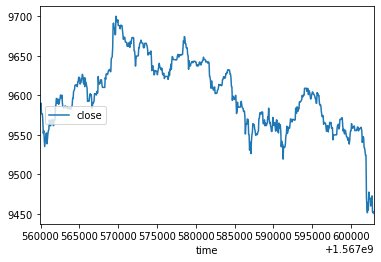

In [16]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections
import time
%matplotlib inline

# def live_plot(data_dict, figsize=(7,5), title=''):
#     clear_output(wait=True)
#     plt.figure(figsize=figsize)
#     for label,data in data_dict.items():
#         plt.plot(data, label=label)
#     plt.title(title)
#     plt.grid(True)
#     plt.xlabel('epoch')
#     plt.legend(loc='center left') # the plot evolves to the right
#     plt.show();
    
for i in range(10):  # how to interactively stop this ?  DO we even need it ? probably not for REST interface anyway...
    clear_output(wait=True)
    plt.figure(figsize=(7,5))
    
    ohlc = await kraken.ohlc() #since=ohlc.get('last'))
    ohlc_df = ohlc.get('parsed').get('XXBTZEUR')
    # convert what we want to draw to numeric to please mpl
    ohlc_df.close = pd.to_numeric(ohlc_df.close)
    ohlc_df.plot(x='time', y='close') 
    
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()
     
    time.sleep(10.0)  # careful with rate limits...

In [17]:
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

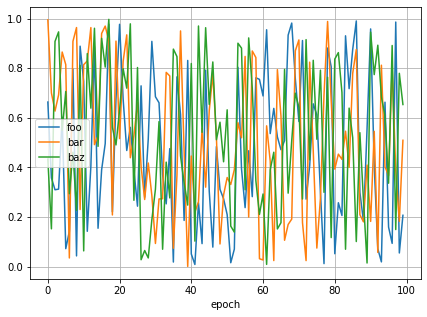

In [18]:
import time

data = collections.defaultdict(list)
for i in range(100):
    time.sleep(1.0)
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)